<h1>Импорт библиотек

In [55]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [8]:
def sum_prod(X, V):
    '''
    X - список матриц (n, n)
    V - список векторов (n, 1)
    Гарантируется, что len(X) == len(V)
    
    Возвращает сумму произведений матриц на векторы.
    '''
    result = np.zeros_like(V[0], dtype=float)  # Инициализируем результат нулевым вектором той же размерности, что и V[0]
    
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector).astype(float)  # Приводим произведение к типу float и суммируем
    
    return result

# Тесты
def test_sum_prod():
    # Тест 1: Простые матрицы и векторы
    X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V = [np.array([[1], [0]]), np.array([[0], [1]])]
    expected = np.array([[7], [11]], dtype=float)
    assert np.array_equal(sum_prod(X, V), expected), f"Expected {expected}, but got {sum_prod(X, V)}"
    
    # Тест 2: Единичные матрицы и векторы
    X = [np.eye(2), np.eye(2)]
    V = [np.array([[1], [1]]), np.array([[1], [1]])]
    expected = np.array([[2], [2]], dtype=float)
    assert np.array_equal(sum_prod(X, V), expected), f"Expected {expected}, but got {sum_prod(X, V)}"
    
    # Тест 3: Матрицы с нулями
    X = [np.zeros((2, 2)), np.array([[1, 2], [3, 4]])]
    V = [np.array([[1], [1]]), np.array([[1], [1]])]
    expected = np.array([[3], [7]], dtype=float) 
    assert np.array_equal(sum_prod(X, V), expected), f"Expected {expected}, but got {sum_prod(X, V)}"
    
    print("All tests passed!")

# Запуск тестов
test_sum_prod()

All tests passed!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [12]:
def binarize(M, threshold=0.5):
    '''
    Бинаризует матрицу M по порогу threshold.
    Все значения, большие или равные порогу, становятся равными 1, остальные 0.
    '''
    return (M >= threshold).astype(int)  # Преобразуем к int, чтобы получить 0 или 1

# Тесты
def test_binarize():
    # Тест 1: Простая матрица
    M = np.array([[0.1, 0.4], [0.6, 0.9]])
    expected = np.array([[0, 0], [1, 1]])
    assert np.array_equal(binarize(M, 0.5), expected), f"Expected {expected}, but got {binarize(M, 0.5)}"
    
    # Тест 2: Единичная матрица
    M = np.eye(3)
    expected = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # Исправлено ожидаемое значение
    assert np.array_equal(binarize(M, 1.0), expected), f"Expected {expected}, but got {binarize(M, 1.0)}"
    
    # Тест 3: Матрица с отрицательными числами
    M = np.array([[-1, 0], [0.5, 1.5]])
    expected = np.array([[0, 0], [0, 1]])
    assert np.array_equal(binarize(M, 1.0), expected), f"Expected {expected}, but got {binarize(M, 1.0)}"
    
    print("All tests passed!")

# Запуск тестов
test_binarize()


All tests passed!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [44]:
def unique_rows(mat):
    """Возвращает уникальные элементы для каждой строки матрицы."""
    return np.array([np.unique(row) for row in mat])

def unique_columns(mat):
    """Возвращает уникальные элементы для каждого столбца матрицы."""
    if mat.shape[0] == 0:  # Проверяем, является ли матрица пустой
        return np.array([])  # Возвращаем пустой массив
    return np.array([np.unique(mat[:, col]) for col in range(mat.shape[1])])

# Тесты
def test_unique_functions():
    # Тест 1: Простой случай
    mat = np.array([[1, 2, 2], 
                    [3, 3, 4], 
                    [5, 6, 6]])
    expected_rows = np.array([[1, 2], [3, 4], [5, 6]])  # Ожидаемое значение для строк
    expected_columns = [np.array([1, 3, 5]), np.array([2, 3, 6]), np.array([2, 4, 6])]  # Ожидаемое значение для столбцов
    assert np.array_equal(unique_rows(mat), expected_rows), f"Expected {expected_rows}, but got {unique_rows(mat)}"
    
    # Проверяем уникальные элементы для столбцов
    unique_col_results = unique_columns(mat)
    for i in range(len(expected_columns)):
        assert np.array_equal(unique_col_results[i], expected_columns[i]), f"Expected {expected_columns[i]}, but got {unique_col_results[i]}"

    # Тест 2: Матрица с одинаковыми элементами
    mat = np.array([[1, 1, 1], 
                    [1, 1, 1], 
                    [1, 1, 1]])
    expected_rows = np.array([[1], [1], [1]])  # Все строки содержат только 1
    expected_columns = [np.array([1])]  # Все столбцы содержат только 1
    assert np.array_equal(unique_rows(mat), expected_rows), f"Expected {expected_rows}, but got {unique_rows(mat)}"
    
    # Проверяем уникальные элементы для столбцов
    unique_col_results = unique_columns(mat)
    assert np.array_equal(unique_col_results[0], np.array([1])), f"Expected {np.array([1])}, but got {unique_col_results[0]}"

    # Тест 3: Пустая матрица
    mat = np.empty((0, 3))  # Пустая матрица с 3 столбцами
    expected_rows = np.empty((0,))  # Пустой результат, так как нет строк
    assert np.array_equal(unique_rows(mat), expected_rows), f"Expected {expected_rows}, but got {unique_rows(mat)}"
    
    # Проверяем пустые столбцы
    unique_col_results = unique_columns(mat)
    assert unique_col_results.size == 0, "Expected empty result for columns"  # Проверяем, что результат пустой

    print("All tests passed!")

# Запуск тестов
test_unique_functions()

All tests passed!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Generated Matrix:
[[-1.02164534 -0.47912805 -0.0456265   0.14648352]
 [-1.44359749 -2.46230659  0.40862885  0.90995817]
 [-2.43899438  0.48512408 -0.64019028 -0.40692881]
 [ 1.34654078  2.23960342 -0.43054856  0.31271244]
 [-0.01025254  1.13328813 -0.93269219 -0.82429746]]

Row Means: [-0.34997909 -0.64682927 -0.75024735  0.86707702 -0.15848852]
Row Variances: [0.20173016 1.86709412 1.12699732 1.02621661 0.68333842]
Column Means: [-0.7135898   0.1833162  -0.32808574  0.02758557]
Column Variances: [1.66873034 2.53200083 0.21919769 0.35770458]


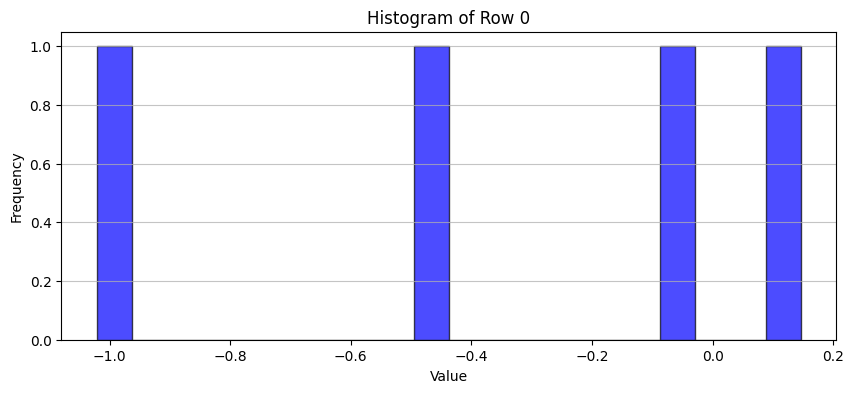

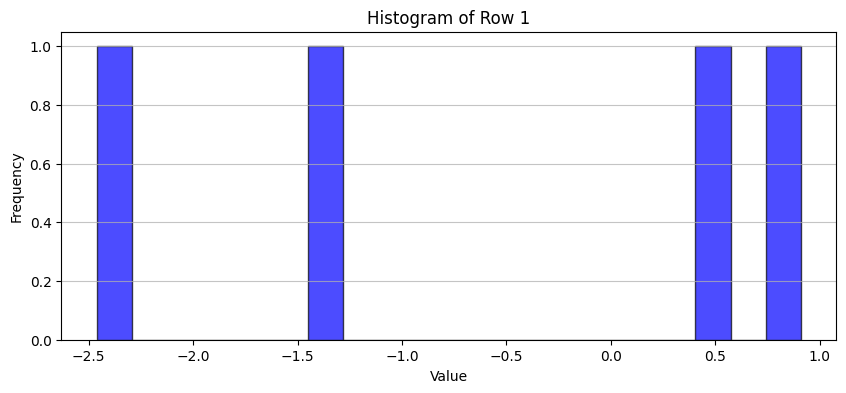

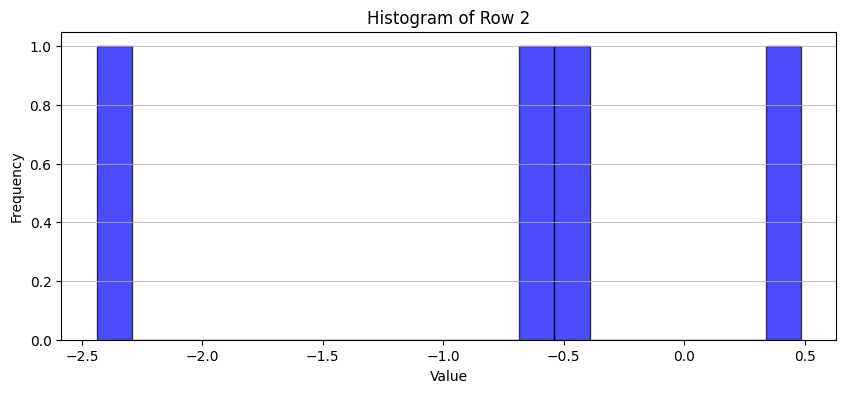

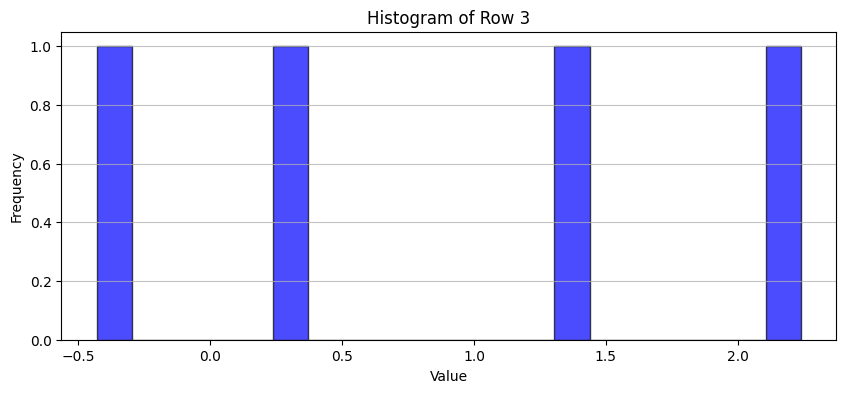

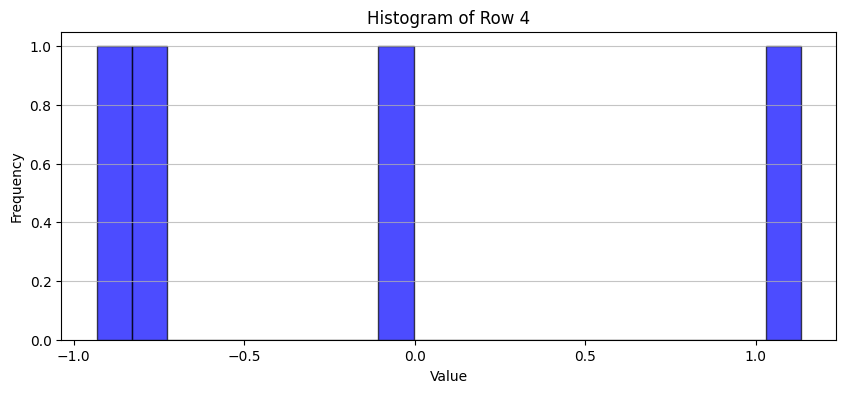

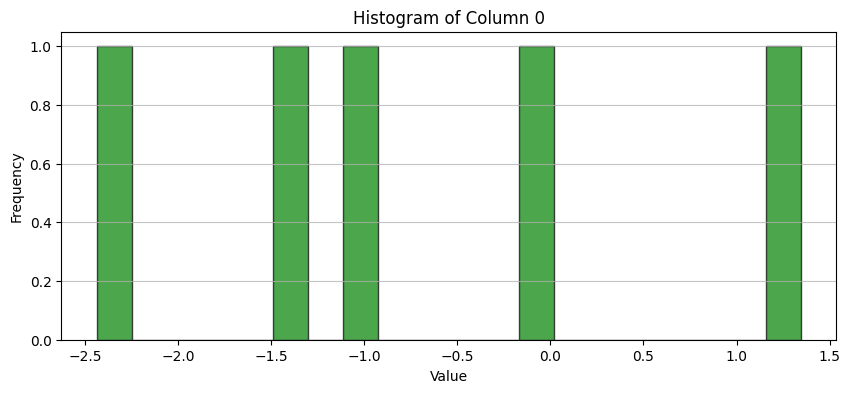

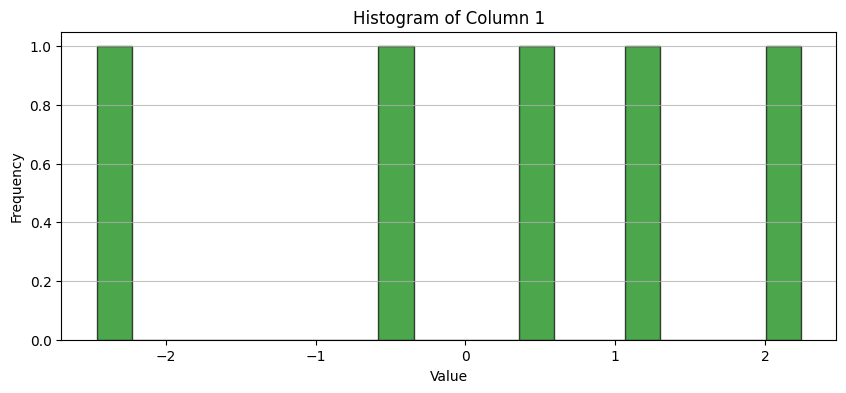

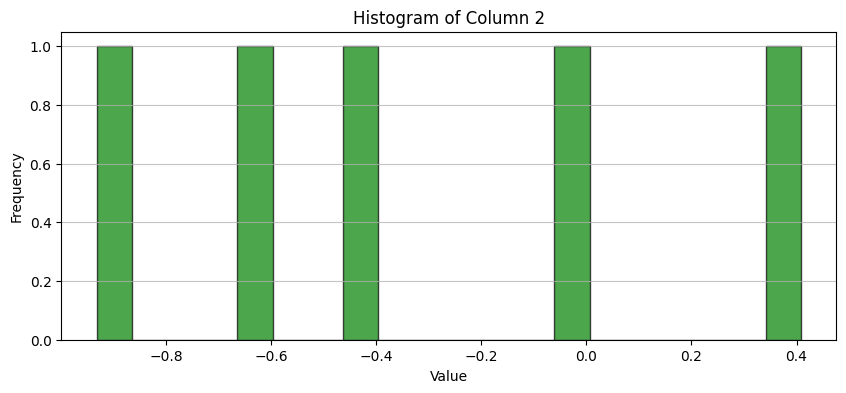

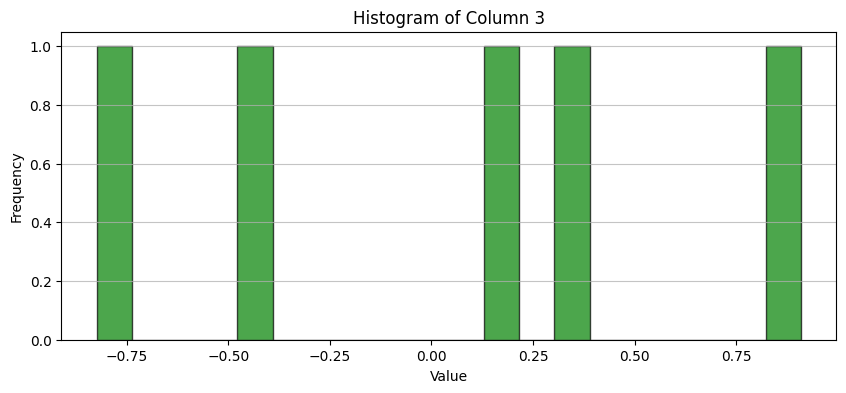

In [47]:
def generate_matrix(m, n):
    """Генерирует матрицу размером (m, n) со случайными числами, распределенными по нормальному закону."""
    return np.random.normal(loc=0, scale=1, size=(m, n))

def compute_statistics(matrix):
    """Вычисляет мат. ожидание и дисперсию для строк и столбцов матрицы."""
    row_means = np.mean(matrix, axis=1)  # Математическое ожидание для строк
    row_variances = np.var(matrix, axis=1)  # Дисперсия для строк
    
    col_means = np.mean(matrix, axis=0)  # Математическое ожидание для столбцов
    col_variances = np.var(matrix, axis=0)  # Дисперсия для столбцов
    
    return (row_means, row_variances), (col_means, col_variances)

def plot_histograms(matrix):
    """Строит гистограммы для каждой строки и столбца матрицы."""
    # Гистограммы для строк
    for i, row in enumerate(matrix):
        plt.figure(figsize=(10, 4))
        plt.hist(row, bins=20, alpha=0.7, color='blue', edgecolor='black')
        plt.title(f'Histogram of Row {i}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

    # Гистограммы для столбцов
    for j in range(matrix.shape[1]):
        plt.figure(figsize=(10, 4))
        plt.hist(matrix[:, j], bins=20, alpha=0.7, color='green', edgecolor='black')
        plt.title(f'Histogram of Column {j}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

def main(m, n):
    """Основная функция для генерации матрицы и вычисления статистики."""
    matrix = generate_matrix(m, n)
    print("Generated Matrix:")
    print(matrix)
    
    (row_means, row_variances), (col_means, col_variances) = compute_statistics(matrix)
    
    print("\nRow Means:", row_means)
    print("Row Variances:", row_variances)
    print("Column Means:", col_means)
    print("Column Variances:", col_variances)
    
    plot_histograms(matrix)

# Запуск программы с заданными размерами матрицы
m = 5  # Количество строк
n = 4  # Количество столбцов
main(m, n)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [50]:
def chess(m, n, a, b):
    """Создает матрицу размером (m, n), заполненную числами a и b в шахматном порядке."""
    matrix = np.zeros((m, n))  # Инициализация матрицы нулями
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a  # Заполняем a на четных позициях
            else:
                matrix[i, j] = b  # Заполняем b на нечетных позициях
    return matrix

def test_chess():
    """Тесты для функции chess."""
    # Тест 1: Простой случай
    expected_1 = np.array([[1, 2], [2, 1]])
    result_1 = chess(2, 2, 1, 2)
    assert np.array_equal(result_1, expected_1), f"Expected {expected_1}, but got {result_1}"

    # Тест 2: Большая матрица
    expected_2 = np.array([[1, 2, 1], [2, 1, 2], [1, 2, 1]])
    result_2 = chess(3, 3, 1, 2)
    assert np.array_equal(result_2, expected_2), f"Expected {expected_2}, but got {result_2}"

    # Тест 3: Четные размеры
    expected_3 = np.array([[1, 2, 1, 2], [2, 1, 2, 1]])  # Исправлено на 2x4 матрицу
    result_3 = chess(2, 4, 1, 2)
    assert np.array_equal(result_3, expected_3), f"Expected {expected_3}, but got {result_3}"

    # Тест 4: Пустая матрица
    expected_4 = np.empty((0, 0))
    result_4 = chess(0, 0, 1, 2)
    assert np.array_equal(result_4, expected_4), f"Expected {expected_4}, but got {result_4}"

    print("All tests passed!")

# Запуск тестов
test_chess()


All tests passed!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

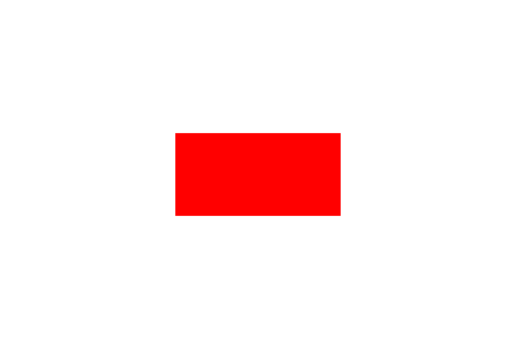

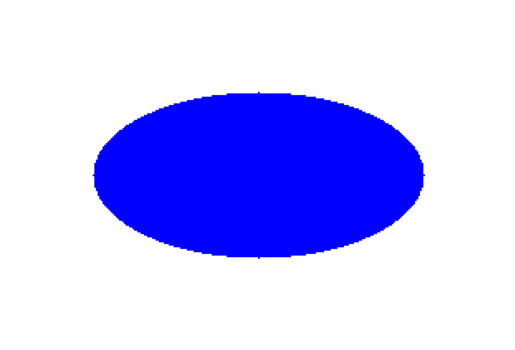

In [56]:
# Функция для отрисовки прямоугольника
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # Создаем изображение с фоном
    img = np.ones((n, m, 3), dtype=np.uint8)
    img[:, :] = background_color

    # Координаты прямоугольника, расположенного по центру
    start_x = (m - a) // 2
    start_y = (n - b) // 2

    # Заполняем область прямоугольника
    img[start_y:start_y+b, start_x:start_x+a] = rectangle_color
    
    # Отрисовка с помощью matplotlib
    plt.imshow(img)
    plt.axis('off')  # Отключаем оси для более чистого изображения
    plt.show()

# Функция для отрисовки эллипса
def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    # Создаем изображение с фоном
    img = np.ones((n, m, 3), dtype=np.uint8)
    img[:, :] = background_color

    # Центр эллипса
    center_x = m // 2
    center_y = n // 2

    # Создаем сетку координат
    y, x = np.ogrid[:n, :m]

    # Уравнение эллипса: ((x - x0)^2 / a^2) + ((y - y0)^2 / b^2) <= 1
    ellipse_mask = ((x - center_x) ** 2 / a ** 2 + (y - center_y) ** 2 / b ** 2) <= 1

    # Закрашиваем эллипс
    img[ellipse_mask] = ellipse_color

    # Отрисовка с помощью matplotlib
    plt.imshow(img)
    plt.axis('off')  # Отключаем оси для более чистого изображения
    plt.show()

# Тестирование функций
draw_rectangle(100, 50, 300, 200, [255, 0, 0], [255, 255, 255])

draw_ellipse(100, 50, 300, 200, [0, 0, 255], [255, 255, 255])


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [53]:
def calculate_statistics(series):
    """Вычисляет математическое ожидание, дисперсию и СКО."""
    mean = np.mean(series)
    variance = np.var(series)
    std_dev = np.std(series)
    return mean, variance, std_dev

def find_local_extrema(series):
    """Находит локальные максимумы и минимумы."""
    local_maxima = []
    local_minima = []

    for i in range(1, len(series) - 1):
        if series[i] > series[i - 1] and series[i] > series[i + 1]:
            local_maxima.append(i)
        elif series[i] < series[i - 1] and series[i] < series[i + 1]:
            local_minima.append(i)

    return np.array(local_maxima), np.array(local_minima)

def moving_average(series, window_size):
    """Вычисляет скользящее среднее."""
    if window_size > len(series):
        return np.array([])  # Если размер окна больше длины ряда, возвращаем пустой массив
    return np.convolve(series, np.ones(window_size) / window_size, mode='valid')

time_series = np.array([1, 3, 2, 5, 4, 6, 7, 3, 2, 5, 8, 10, 9, 8, 12])

# Вычисление статистик
mean, variance, std_dev = calculate_statistics(time_series)
print(f"Математическое ожидание: {mean}")
print(f"Дисперсия: {variance}")
print(f"СКО: {std_dev}")

# Нахождение локальных максимумов и минимумов
local_maxima, local_minima = find_local_extrema(time_series)
print(f"Локальные максимумы: {local_maxima}")
print(f"Локальные минимумы: {local_minima}")

# Вычисление скользящего среднего с размером окна p
p = 3
moving_avg = moving_average(time_series, p)
print(f"Скользящее среднее (p={p}): {moving_avg}")


Математическое ожидание: 5.666666666666667
Дисперсия: 9.955555555555556
СКО: 3.155242550986462
Локальные максимумы: [ 1  3  6 11]
Локальные минимумы: [ 2  4  8 13]
Скользящее среднее (p=3): [2.         3.33333333 3.66666667 5.         5.66666667 5.33333333
 4.         3.33333333 5.         7.66666667 9.         9.
 9.66666667]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [54]:
def one_hot_encode(vec):
    n_classes = np.max(vec) + 1  # Определение количества классов
    one_hot = np.zeros((len(vec), n_classes), dtype=int)  # Создание матрицы с нулями
    one_hot[np.arange(len(vec)), vec] = 1  # Заполнение соответствующих ячеек единицами
    return one_hot

vec = np.array([0, 2, 3, 0])
print(one_hot_encode(vec))


[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
